<a href="https://colab.research.google.com/github/mzyatkov/Comp_math/blob/main/%D0%A7%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D0%B5_%D0%B4%D0%B8%D1%84%D1%84%D0%B5%D1%80%D0%B5%D0%BD%D1%86%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B5%D0%BE%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Теоретическое описание метода неопределенных коэффициентов и его программная реализация

Пусть в одномерной области $[x_{min}, x_{max}]$ задана равномерная сетка из $N = m + l + 1$ узлов (Равномерная сетка - сетка, расстояние между двумя любыми соседними узлами которой равно постоянному h, где h - сеточный шаг). На этой области определена бесконечно непрерывно дифференцируемая ф-я $f$. Известны значения этой ф-и во всех узлах рассматриваемой сетки $\{f_i\}_{i=0}^N$ (говорять, что определена сеточная ф-я - проекция ф-и на сетку). Пусть нас интересует значение производной в некотором узле $j$, слева от которого $l$ узлов, справа $m$. Построим метод максимального порядка точности по значениям функции в сеточных узлах. Для этого представим производную в узле $j$ как сумму значений ф-и во всех узлах, взятых с некоторыми весами:
$$
f'(x_j) \approx \frac{1}{h}\sum_{k = -l}^m \alpha_k f(x_j+kh)
$$
Подберем веса так, чтобы по этим значениям порядок точности был максимальным. Оказывается, что по $N$ точкам можно построить метод $N-1$-го порядка точности.

#### Контрольный вопрос: что такое порядок точности метода?

Ваш ответ: Порядок точности - это максимальное число первых членов ряда Тейлора полученного решения, совпадающих с теоретическим решением 

Для этого разложим в ряд Тейлора все члены, входящие в суммирование в выбранной аппроксимации (численном приближении), относительно точки $x_j$, сгруппируем члены при одинаковых степенях и приравняем к нулю коэффициенты при степенях ниже N (кроме первой, для нее приравняем к 1). В итоге получим N уравнений относительно N неизвестных.

#### Контрольный вопрос: почему в этом случае порядок метода будет $N-1$?

Ваш ответ: Если число точек равно $N$, то число уравнений равно $N$, значит в разложении $f(x_0+kh)$ члены до порядка $N-1$, значит и порядок метода $N-1$


В матричном виде получившуюся систему можно представить как $A\alpha = b$, где $b^T$ = $(0,1,0,...,0)^T$, а матрица A
$$
A = \begin{pmatrix} 
1 & 1 & ... & 1 \\
-l & -l+1 & ... & m \\
(-l)^2 & (-l+1)^2 & ... & m^2 \\
(-l)^3 & (-l+1)^3 & ...  & m^3 \\
...&...&...&...\\
\end{pmatrix}
$$

#### Контрольный вопрос: как называется такая матрица? Существует ли единственное решение системы и почему?

Ваш ответ: Матрица Вандермонда. Существует, так как определитель матрицы не равен нулю (значения во второй строчке попарно различны), значит решение существует и единственно
$${\begin{vmatrix}1&x_{1}&\ldots &x_{1}^{{n-1}}\\1&x_{2}&\ldots &x_{2}^{{n-1}}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n}&\ldots &x_{n}^{{n-1}}\\\end{vmatrix}}\ \ =\prod _{{1\leq j<i\leq n}}\!(x_{i}-x_{j}),$$

In [ ]:
#скрипт, который реализует описанный выше алгоритм
import numpy as np
import numpy.linalg as la

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff

p = 4 # порядок метода
a = np.pi/3
b = np.pi/2
h = (b-a)/p
print('h = ', h)
x = np.linspace(a, b, p+1)
u = np.sin(x) #ищем производную синуса

diff = get_diff(u, 0, p, h)
print('diff = ', diff)

h =  0.13089969389957473
diff =  0.49998238989252497


## Часть 1. Ошибка и обусловленность МНК

Задание:

1. написать скрипт, который строит график зависимости абсолютной ошибки от числа узлов
2. написать скрипт, который строит график зависимости числа обусловленности матрицы A системы с ростом ее размерности

Text(0.5, 1.0, 'Зависимость абсолютной ошибки от числа узлов \n для вычисления производной $\\sin(x)$ в точке $\\pi/3$')

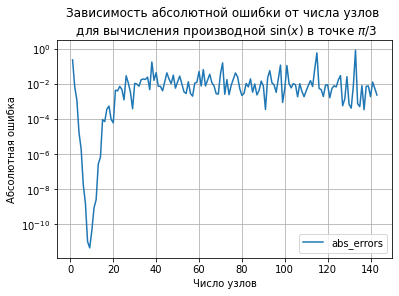

In [18]:
#скрипт, который реализует описанный выше алгоритм
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def get_diff(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    #print(A)
    b = np.zeros(n)
    b[1] = 1
    alpha = la.solve(A,b)
    diff = 1/h*alpha.dot(u.T)
    return diff


y_s = []
x_s = np.arange(1,150)
for N in x_s:
    a = np.pi/3
    b = np.pi/2
    h = (b-a)/N
    #print('h = ', h)
    x = np.linspace(a, b, N+1)
    u = np.sin(x) #ищем производную синуса
    y_s.append(abs(get_diff(u, 0, N, h) - np.cos(a)))

plt.plot(x_s,y_s, label= 'abs_errors')
plt.yscale('log')
plt.legend() #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять
plt.grid() #добавляем сетку на график
plt.xlabel('Число узлов') #подписываем ось x
plt.ylabel('Абсолютная ошибка') #подписываем ось x
plt.title('Зависимость абсолютной ошибки от числа узлов \n для вычисления производной $\sin(x)$ в точке $\pi/3$',) #подписываем график



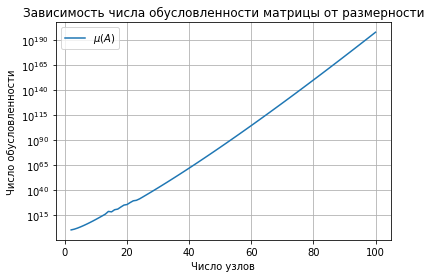

In [ ]:
#скрипт, который реализует описанный выше алгоритм
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def get_mu(u, l, m, h):
    n = u.size
    v = np.linspace(-l,m, n)
    A = np.fliplr(np.vander(v, v.size)).T
    mu = la.cond(A) # произведение норм матрицы и обратной к ней
    return mu


y_s = []
x_s = np.arange(2,101)
for p in x_s:
    a = np.pi/3
    b = np.pi/2
    h = (b-a)/(p-1)
    #print('h = ', h)
    x = np.linspace(a, b, p)
    u = np.sin(x) #ищем производную синуса
    y_s.append(get_mu(u, 0, p-1, h))

plt.plot(x_s,y_s, label= '$\mu(A)$')
plt.legend() #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять
plt.yscale('log')
plt.grid() #добавляем сетку на график
plt.xlabel('Число узлов') #подписываем ось x
plt.ylabel('Число обусловленности') #подписываем ось x
plt.title('Зависимость числа обусловленности матрицы от размерности') #подписываем график
print()


## Часть 2. Оценка порядка точности метода

Рассмотрим метод с порядком точности $p$. Тогда ошибка метода $\epsilon_h = Ch^p$, где $h$ - сеточный шаг. На сетке с двое меньшим шагом ошибка метода будет $\epsilon_{h/2} = C_1 \left(\frac{h}{2}\right)^p$. Если шаг h достаточно мелкий (ф-я меняется не очень сильно), то можно считать, что $C \approx C_1$. Тогда, исключив $C$ из первого равенства за счет второго, можно получить, что
$$
p = \log_2 \frac{\epsilon_h}{\epsilon_{h/2}}
$$

Задание:

3. написать скрипт, который численно будет определять порядок точности методов направленная разность и центральная разность. Построить график зависимости p от шага сетки в широком диапазоне значений h. На графике для h использовать логарифмический масштаб. Объяснить поведение графиков.

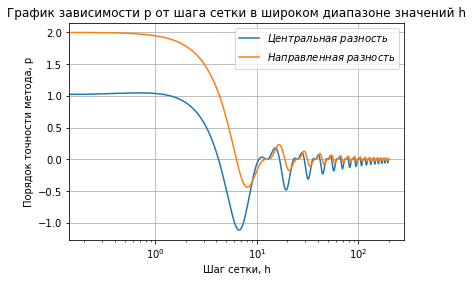

In [ ]:
#скрипт, который реализует описанный выше алгоритм
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

a = np.pi/3
def centr_dif(h):
    return (np.sin(a + h)-np.sin(a))/h
def dir_dif(h):
    return (np.sin(a + h)-np.sin(a-h))/(h*2)
def centr_precision(h):
    if h==0:
        return 0
    return np.log2(abs(centr_dif(h)-np.cos(a))/abs(centr_dif(h/2)-np.cos(a)))
def dir_precision(h):
    if h==0:
        return 0
    return np.log2(abs(dir_dif(h)-np.cos(a))/abs(dir_dif(h/2)-np.cos(a)))

y_centr = []
y_dir=[]
x = np.linspace(0,200,1000)
for h in x:
    y_centr.append(centr_precision(h))
    y_dir.append(dir_precision(h))


plt.plot(x,y_centr, label= '$Центральная\ разность$')
plt.plot(x,y_dir, label= '$Направленная\ разность$')
plt.xscale('log')
plt.legend() #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять
plt.grid() #добавляем сетку на график
plt.xlabel('Шаг сетки, h') #подписываем ось x
plt.ylabel('Порядок точности метода, p') #подписываем ось x
plt.title('График зависимости p от шага сетки в широком диапазоне значений h',) #подписываем график
print()


## Использование sympy для дифференцирования ф-й

Пакет sympy очень удобный инструмент для символьных вычислений. Но не стоит с помощью него реализовывать какие-либо численные методы. Рассмотрим пример его использования для дифференцирования:

In [ ]:
#пример взять отсюда https://maths-with-python.readthedocs.io/en/latest/07-sympy.html
#еще про sympy можно посмотреть здесь http://www.asmeurer.com/sympy_doc/dev-py3k/tutorial/tutorial.ru.html

import sympy as sp
import numpy as np

x = sp.Symbol('x')

expression = x**2*sp.sin(sp.log(x))
print('Первая производная', sp.diff(expression, x))
print('Вторая производная', sp.diff(expression, x, 2))
print('Третья производная', sp.diff(expression, x, 3))

expr2 = sp.sin(x)
expr2 = sp.diff(expr2, x, 2)
expr2.subs(x, np.pi/2) #подстваляем значение и вычисляем символьное выражение

Первая производная 2*x*sin(log(x)) + x*cos(log(x))
Вторая производная sin(log(x)) + 3*cos(log(x))
Третья производная (-3*sin(log(x)) + cos(log(x)))/x


-1.00000000000000